# El perceptrón

## Definición
En machine learning, el perceptrón es un algoritmo de aprendizaje automático supervisado para implementar un modelo de clasificador binario. Qué quiere decir todo esto?

1) Es un algoritmo. Quiere decir que hay varias formas de implemenentar la misma lógica y que se puede implementar en cualquier leguaje de programación (que sea Turing Completo).
2) Que sea de `aprendizaje automático supervisado` quiere decir que para entrenar el modelo, vamos a necesitar un conjunto de datos de entrenamiento que contega pares (entrada, salida). Si por ejemplo, estamos implementado un clasificador para detectar si una imagen contiene un gatito o no, necesitaremos pares de la forma:

| Entrada           | Salida   |
|-------------------|----------|
| Imagen con gatito | true     |
| Imagen con gatito | true     |
| Imagen sin gatito | false    |
| Imagen con gatito | true     |
| ...               | ...      |

Cuando hagamos referencia al conjunto de entradas hablaremos de entradas, features, input, verctor de características, variable independiente, otros nombres; mientras que cuando hablemos del conjunto de las salidas, hablaremos de salidas, output, etiquetas, labels, target, objetivos, variable dependiente, otros nombres.

3) Decimos que el algoritmo implementa el modelo de un clasificador binario por que una vez entrenado, el modelo es capas de hacer una predicción acerca de la si la entrada pertenece o no a una clase particular. Siguiendo con el ejemplo de los gatitos, dada una imagen cualquiera, el modelo predice si hay un gatito en la imagen o no.

## Las partes del perceptrón
El perceptrón (moderno) cuenta con varias partes.
1) **Inputs**: Las entradas del perceptrón. Normalmente denominadas $X = x_0, x_1, x_1, ..., x_n$, es un vector de números.
2) **Weights**: Los pesos del perceptrón. También llamados parámetros del modelo, estos pesos son los que se aprenden durante el proceso de entrenamiento y los que determinan la salida del modelo. Normalmente se lo denomina $W = W_0, W_1, W_2, ..., W_n$. 
3) **Agregation**: Una función de agregación. En general es una suma. Por eso se dice que el perceptrón implementa una suma ponderada, por que es la suma de las entradas ($X$) multiplicada por los pesos ($W$).
4) **Non-linearity**: Una función no lineal de activación. Es una función que determina si el perceptrón se activa o no dada una entrada. Por este motivo se la conoce como `función de activación`. Esta función es no lineal (al contrario de la suma ponderada) y generalmente es una de las siguientes: https://ml-explained.com/blog/activation-functions-explained
5) **Output**: La salida del perceptrón. Normalmente denominada $\hat{y}$ (se pronuncia "y sombrero" o "y hat"), es un valor numérico que luego será interpretado en el contexto del modelo. Volviendo al ejemplo de los gatitos, si la salida es 0 se puede interpretar como que NO hay gatos en la imagen y 1 como lo que SI hay gatos en la imagen.

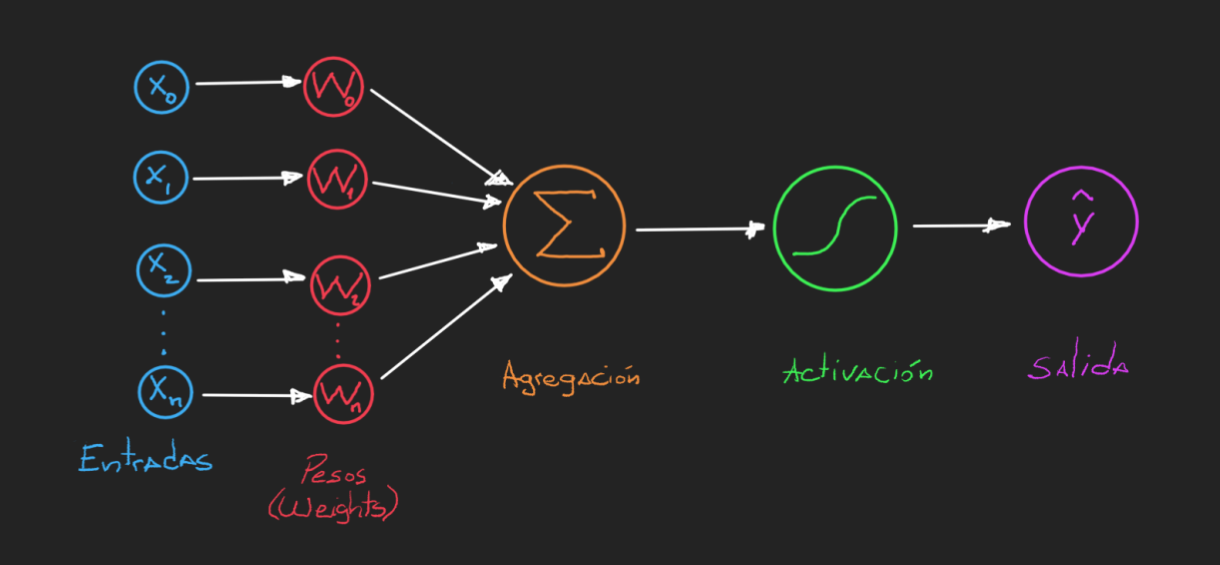

La historia del [perceptrón moderno](https://en.wikipedia.org/wiki/Perceptron) (también llamado Neurona de McCulloch–Pitts) comienza de alguna manera con el paper fundacional de Warren McCulloch y Walter Pitts llamado [A logical calculus of the ideas immanent in nervous activity](https://en.wikipedia.org/wiki/A_Logical_Calculus_of_the_Ideas_Immanent_in_Nervous_Activity) y publicado en 1943, donde se propone un modelo matemático para un sistema nervios basado en componentes simples configurados en forma de red. Posteriormente en 1958, Franck Rosemblatt implementaría este modelo en una computadora física llamada [Mark I Perceptron](https://en.wikipedia.org/wiki/Mark_I_Perceptron). Esta computadora estába orientada a la detección de imágenes, contaba con un sensor de 20x20 fotorreceptores, 512 neuronas artificiales y 8 salidas y podía distingir una E de una F en base a un conjunto de datos de entrenamiento de 30 E's y 30 F's, sin rotación. Durante los 50's y 60's reinaba el optimismo respecto a la Inteligencia Artificial y los fondos fluian hacia todo proyecto que incluyera el término dentro de los marcos de la investigación. Algunas frases de importantes investigadores son reflejo de este optimismo, que ahora sabemos, era infundado. 
- 1958, H. A. Simon and Allen Newell: "within ten years a digital computer will be the world's chess champion" and "within ten years a digital computer will discover and prove an important new mathematical theorem."
- 1965, H. A. Simon: "machines will be capable, within twenty years, of doing any work a man can do."
- 1967, Marvin Minsky: "Within a generation... the problem of creating 'artificial intelligence' will substantially be solved."
- 1970, Marvin Minsky (in Life magazine): "In from three to eight years we will have a machine with the general intelligence of an average human being."

Entre los años 70's y 80's existe una época que hoy se conoce como *El primer invierno de la IA*, marcado por una reducción del financiamiento para la investigación, producido en parte por el infundado optimismo y la falta de cumplimento en las metas (algunas muy ambiciosas) de los proyectos de investigación. Sin embargo, fue una época donde el desarrollo no se detuvo y donde se cimentaron los avances de años posteriores. En 1982, se revivió el interés por las arquitecturas neuronales organizadas en redes, principalmente devido a dos avances de importancia. Primero, el físico John Hopfield fue capás de probar matemáticamente que una arquitectura de red neuronal (hoy conocida como [Hopfield Net](https://en.wikipedia.org/wiki/Hopfield_network)) podía aprender y procesar información y que podía converger, dado suficiente tiempo, bajo cualquier condición fija. Esto representó un quiebre ya que hasta ese momento se creía que las redes neuronales lineales no podían converger y por el contrario, evolucionaban de manera caótica. Alrededor de la misma fecha, Geoffrey Hinton y David Rumelhart popularizaron un método para entrenar redes neuronales utilizado hasta nuestros días y conocido como [*backpropagation*](https://en.wikipedia.org/wiki/Backpropagation). Se trata de una aplicación eficiente de la regla de la cadena a las redes neuronales. La técnica de backpropagation calcula el gradiente de una función de pérdida (loss function) con respecto a los pesos de la red para un único ejemplo de entrada-salida, y lo hace de manera eficiente, calculando el gradiente capa por capa, iterando hacia atrás desde la última capa para evitar cálculos redundantes de términos intermedios en la regla de la cadena. Esto se puede derivar mediante el uso de técnicas de programación dinámica. Estrictamente hablando, la técnica de backpropagation se usa para obtener los gradientes pero no determina como estos son usados. En el perceptrón, usamos el gradiente para actualizar sus pesos (Weights). 

## Cómo se entrena un perceptrón?
Veamos un ejemplo más de como se entrena un perceptrón. Dijimos que para entender cómo se entrena un perceptrón nos conviene ver a éste como una fórmula matemática, donde la salida $\hat{y}$ es el resultado de aplicar alguna función a las entradas $X$. Si llamamos a esta función $f$, entonces, $\hat{y}$ no es otra cosa que $$\hat{y} = f(X)$$ Esta salida ($\hat{y}$) es la predicción del modelo. Si el perceptrón está sin entrenar, la salida del modelo es cualquier cosa. Pero cuando el perceptrón está entrenado, dada una entrada $X$, el modelo va a realizar una predicción $\hat{y}$ para esa entrada. Que tan buena es la predicción se mide usando la función de perdida o *loss function*.

La función $f$ no es cualquier cosa. Para que podamos entrenar la función, tiene que haber algunos componentes que podamos cambiar. Las entradas $X$ vienen dadas, no podemos cambiarlas. Tampoco podemos cambiar el orden en el cual las operaciones que realizan, en un perceptrón todas las operaciones que se realizan son fijas y se ejecutan en un orden determinado. Pero una parte de la función son los pesos $W$. Que el perceptrón esté sin entrenar, no significa otra cosa que que el valor de estos pesos es aleatorio, que es la forma de inicializar el perceptrón al momento de su creación. Es el valor de estos pesos $W$ lo que podemos cambiar a voluntad para que, a medida que entrenemos el perceptrón, la predicción $\hat{y}$ sea la mejor posible.

Entrenar un perceptrón no es otra cosa que encontrar los pesos correspondientes en la función que haga que la predicción sea buena para algunas de las entradas.

### La puerta lógica OR
Supongamos que queremos entrenar una función $f$ que tiene como entrada un único $X = [x_0, x_1]$ de manera tal que $f$ se comporte como el OR lógico. Recordemos que el OR acepta entradas binarias, 0 o 1, y que cuando tanto $x_0$ como $x_1$ son 0, el resultado $y$ será 0 y será 1 en caso contrario. La tabla completa del OR es como sigue:

|  x₀ |  x₁ |   x₀ OR x₁ |
|-----|-----|------------|
|  0  |  0  |      0     |
|  0  |  1  |      1     |
|  1  |  0  |      1     |
|  1  |  1  |      1     |

Sabiendo esto podemos usar los $X = [x_0, x_1]$ como entradas y el resultado de la operación OR como las etiquetas para entrenar un perceptrón. Es decir que nuestro $X$ será $X = [[0, 0], [0, 1], [1, 0], [1, 1]]$ y nuestro $y$ será $y = [[0], [1], [1], [1]]$. Notar que tanto $X$ como $y$ son listas de listas. Luego veremos como relajar esto pero en definitiva, significa que $X$ tiene dos columnas $x_0 = [[0], [0], [1], [1]]$ y $x_1 = [[0], [1], [0], [1]]$ y que $y$ es una columna. Definamos esto en python ya mismo como arrays de numpy.

In [ ]:
# primero unos imports
import matplotlib.pyplot as plt
import numpy as np

Definamos entonces nuestro perceptrón como una función $f$ de la siguiente manera. $$\hat{y} = f(X) = ReLU(x_0 * W_0 + x_1 * W_1)$$
Aunque en el caso general para un perceptrón con $n+1$ entradas podríamos decir que $\hat{y}$ es:

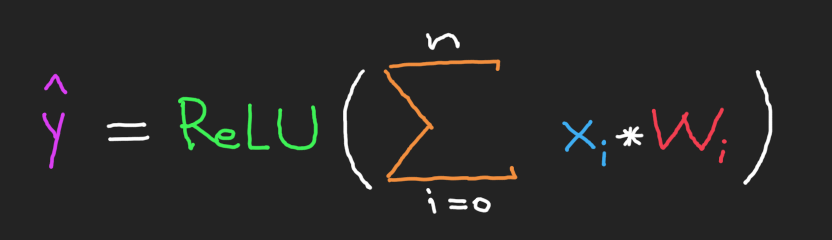

A diferencia de la prueba que hicimos en el video anterior, ahora el perceptrón tiene una función de activación no lineal llamadar ReLU, por Regularized Linear Unit. Esta función se comporta de la siguiente manera: 
$$ReLU(x) = \begin{cases}
0 & \text{si } x \leq 0 \\
x & \text{si } x \gt 0
\end{cases}$$
Este es un perceptrón que tiene todo el poder necesario para aprender la función OR. Esto parece poco, y en efecto lo es. Para aprender otras funcions como el NAND, la función de activación ReLU nos va a limitar. Vamos a ver que esto se puede solucionar utilizando una función de activación diferente y que este perceptrón apensa va a poder aprender a comportarse como el OR.

Podemos graficar la función ReLU fácilmente en python usando *matplotlib*.

Dado nuestro perceptrón escrito así $\hat{y} = f(X) = ReLU(x_0 * W_0 + x_1 * W_1)$, y con la función `relu(x)` definida, estamos listos para implementar nuestro perceptrón en python!

El resultado no está ni cerca de el valor esperado para nuestra función $f$. Por ejemplo, para $x_0 = 0$ y $x_1 = 0$ el resultadado debería ser $1$ (porque *OR*$(0,1) = 1$). Vimos que esto se llama *Forward Pass*. Enviamos la entrada a la función, la ejectuamos y vemos cual es el resultado. Lo que intuitivamente deberíamos hacer ahora es modificar los pesos $W$ para que la próxima vez que ejecutemos la función $f$, el resultado se acerque más al valor esperado. Para esto, debemos calcular cuan lejos está el resultado del modelo $\hat{y}$ (la predicción) del verdadero valor (esperado) para la función $f$ al cual llamamos $y$. La forma de calcular la distancia entre $\hat{y}$ e $y$ depende del problema y puede ser todo lo complicada que uno quiera. Está claro que es otra función que depende de los valores esperados (lo que queremos que el modelo devuelva, $y$) y los valores predichos (lo que el modelo devuelve de verdad. $\hat{y}$), y que estos valores además dependen de las entradas $X$ y de los pesos $W$. Esta nueva función se llama *función de pérdida* o *loss function* y en las fórmulas la vamos a llamar $L$.  

Para muchos muchos problemas, alcanza con que $L$ sea la diferencia (la resta) entre el valor esperado y el valor predicho. Eso de alguna manera nos dará información de la distancia a la que estamos del valor esperado dada una predicción. Existen varios problemas con este enfoque. El primero es que la resta tiene signo (puede dar valores negativos). Ya veremos por que esto es un problema. Lo segundo es que idealmente queremos que el valor de $L$ represente de alguna manera que tan lejos estamos del objetivo, no solo para un caso de las entradas sino para todos los valores que puedan tomar las entradas $X$ (o al menos para unos cuantos).

Para eliminar estos problemas, en lugar de la resta, utilizamos el error cuadrático medio (MSE). El MSE se puede definir formalmente, usando la misma notación que venimos usando, como:
$$MSE(y,\hat{y}) = \frac{1}{n} \sum_i^n (y_i - \hat{y}_i)²$$

De esa manera, podemos representar que tan lejos estamos del objetivo usando una función que retorna un único valor positivo para la distancia entre un grupo de entradas y un grupo de salidas. Escribamos todo esto en python.

Intuitivamente, podemos ver que $L$ valdrá 0 solamente cuando los valores predichos $\hat{y}$ sean iguales a $y$. Resulta que "entrenar" a nuestra función $f$ para que aprenda algo, es matemáticamente equivalente a ajustar los pesos $W$ de manera tal de minimizar la función de perdida $L$. Si recuerdan sus clases de cálculo, esto puede hacerse utilizando la derivada de $L$ con respecto a los pesos $W$ para encontrar el mínimo. Esto se hace utilizando un motor de cálculo de gradientes o Autograd.

Escribamos nuestro perceptrón utilizando Michigrad, nuestro mini motor de cálculo de gradientes. Además de poder calcular las derivadas de nuestro grafo de operaciones para $L$, Michigrad nos permitirá visualizar el grafo de operaciones necesarias para llegar hasta $L$.

No confundan este grafo con el grafo que representa el perceptrón.

Como puede verse a partir del grafo de $L$, ahora es mucho más difícil determinar que valores son los mejores para los pesos $W$ que cuando teniamos una sola entrada. Pero al tener los valores calculados con Michigrad, es posible a su vez calcular como cada uno de los dos $W$, $W_0$ y $W_1$ afectan a $L$. Luego haremos cosas parecidas usando un motor más potente, **PyTorch**. Sin embargo, lo vamos a hacer por una cuestión de eficiencia. Tanto Michigrad, como [Micrograd](https://github.com/karpathy/micrograd) (el motor de Andrej Karpathy en el que basamos Michigrad), como [PyTorch](https://pytorch.org/), como [TensorFlow](https://www.tensorflow.org/) y otros motores de cálculo de gradientes usan esencialmente las mismas matemáticas, basadas en programación dinámica, las derivadas parciales y la regla de la cadena.

Lo que debemos hacer ahora es escribir un bucle de entrenamiento para nuestro perceptrón. Recordemos los pasos que debe tener el bucle
1. Hacer la *forward pass*, para ver cual es el resultado del model para $\hat{y}$ para todas las entradas en nuestro conjunto de entrenamiento.
2. Calcular la función de perdida $L$ en base a los valores conocidos de $y$ y los recientemente calculados para $\hat{y}$.
3. Poner los gradientes para los pesos $W$ en cero.
4. Ejecturar el algoritmo de backpropagation para calcular los gradientes de los pesos $W$.
5. Actualizar los pesos de $W$ en la dirección contraria al gradiente.

Probemos el resultado de nuestro modelo entrenado.

## Resumen

Entrenar un perceptrón, no es muy diferente de entrenar nuestra función $f$. Los pasos serán siempre los mismo, ya sea usando *Michigrad* o *PyTorch*.

1. Hacer la forward pass. Calcular el valor de nuestra predicción $\hat{y}$ ejecutando el modelo.
2. Calcular la funcion de perdida $L$ en base a los valores conocidos de $y$ (por eso es supervisado). 
3. Poner los gradientes del grafo de dependencias en cero.
4. Ejecutar el algoritmo de backpropagation sobre el grafo de operaciones de $L$ para obtener los gradientes de $W$ respecto de $L$.
5. Actualizar los pesos de los $W$ en la dirección contraria al gradiente.

## Práctica

* Entrenar un perceptrón para que se comporte como una compuerta lógica AND (Dificultad: **Fácil**)
  * Pista: cambiar $y$ para que las etiquetas correspondan con la salida de la compuerta AND.
* Entrenar un perceptrón para que aprenda a sumar $x_0 + x_1$ (Dificultad: **Intermedio**)
  * Pista: cambiar $y$ para que las etiquetas corresponda con la suma de $x_0 + x_1$.
* Entrenar una perceptrón para que se comporte como una compuerta NAND (Dificultad: **Difícil**)
  * Pista: reemplazar la función de activación por una $tanh$. Se puede modificar Michigrad (pero hay que implementar backward para la operación) o escribir $tanh(x)$ como $$tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}$$ Todas esas operaciones se pueden hacer usando los Values de Michigrad.
* Entrenar un perceptrón para que se comporte como una compuerta lógica XOR (Dificultad: **Difícil**)
  * Pista: en este caso no alcanza con usar un perceptrón. Hay que usar varios!